In [1]:
import tensorflow as tf 

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import PIL
import time
import glob
import imageio

In [2]:
def get_image(i):
    path = r'D:\Área de Trabalho\Datasets\Image\img_align_celeba'
    path = '{}\\{:06d}.jpg'.format(path, i)
    img = np.asarray(PIL.Image.open(path).crop((20, 45, 160, 185)).resize((64, 64)))
    img = (img/255.).astype(np.float32)
    return img

In [3]:
def build_encoder():
    model = tf.keras.Sequential([
                                tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64,64,3)),
                                tf.keras.layers.Conv2D(64, 3, activation='relu'),
                                tf.keras.layers.Conv2D(128, 3, activation = 'relu'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(latent_dims)
    ])
    return model

In [4]:
def build_decoder():
    model = tf.keras.Sequential([
                               tf.keras.layers.Dense(8*8*256, use_bias=False, input_shape=(latent_dims, )),
                               tf.keras.layers.Reshape((8, 8, 256)),
                               tf.keras.layers.Conv2DTranspose(128, 5, padding='same'),
                               tf.keras.layers.Conv2DTranspose(64, 5, strides=2, padding='same'),
                               tf.keras.layers.Conv2DTranspose(32, 5, strides=2, padding='same'),
                               tf.keras.layers.Conv2DTranspose(3, 5, strides=2, padding='same', activation='sigmoid')
  ])
    assert model.output_shape == (None, 64, 64, 3)
    return model

In [5]:
class AutoEncoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = build_encoder()
        np.array([get_image(i+1) for i in range(300)])
        self.decoder = build_decoder()

    def encode(self, input_image):
        return self.encoder(input_image)
  
    def decode(self, latent_vector):
        return self.decoder(latent_vector)
 
    def call(self, input_image):
        return self.decode(self.encode(input_image))

In [10]:
BATCH_SIZE = 32
EPOCHS = 300
BUFFER_SIZE = 1028
latent_dims = 150

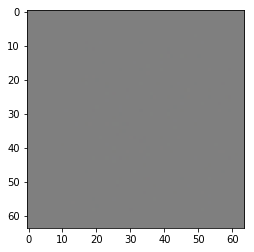

In [11]:
model = AutoEncoder(latent_dims)
model.compile(loss=tf.keras.losses.mse, 
             optimizer=tf.keras.optimizers.Adam(1e-4) ,
             metrics=['accuracy'])
out = model(np.array([get_image(1)]))
plt.imshow(np.squeeze(out))

In [12]:
train_images = np.array([get_image(i+1) for i in range(BUFFER_SIZE)])
model.fit(train_images, train_images, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2)

Train on 1028 samples
Epoch 1/300
1028/1028 - 3s - loss: 0.0770 - accuracy: 0.6172
Epoch 2/300
1028/1028 - 2s - loss: 0.0522 - accuracy: 0.7963
Epoch 3/300
1028/1028 - 2s - loss: 0.0376 - accuracy: 0.8329
Epoch 4/300
1028/1028 - 2s - loss: 0.0312 - accuracy: 0.8302
Epoch 5/300
1028/1028 - 2s - loss: 0.0270 - accuracy: 0.8310
Epoch 6/300
1028/1028 - 2s - loss: 0.0245 - accuracy: 0.8344
Epoch 7/300
1028/1028 - 2s - loss: 0.0242 - accuracy: 0.8351
Epoch 8/300
1028/1028 - 2s - loss: 0.0217 - accuracy: 0.8401
Epoch 9/300
1028/1028 - 2s - loss: 0.0200 - accuracy: 0.8416
Epoch 10/300
1028/1028 - 2s - loss: 0.0186 - accuracy: 0.8435
Epoch 11/300
1028/1028 - 2s - loss: 0.0180 - accuracy: 0.8446
Epoch 12/300
1028/1028 - 2s - loss: 0.0170 - accuracy: 0.8487
Epoch 13/300
1028/1028 - 2s - loss: 0.0164 - accuracy: 0.8480
Epoch 14/300
1028/1028 - 2s - loss: 0.0157 - accuracy: 0.8510
Epoch 15/300
1028/1028 - 2s - loss: 0.0149 - accuracy: 0.8534
Epoch 16/300
1028/1028 - 2s - loss: 0.0145 - accuracy: 0.

Epoch 133/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8841
Epoch 134/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8839
Epoch 135/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8839
Epoch 136/300
1028/1028 - 2s - loss: 0.0052 - accuracy: 0.8839
Epoch 137/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8834
Epoch 138/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8837
Epoch 139/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8834
Epoch 140/300
1028/1028 - 2s - loss: 0.0052 - accuracy: 0.8836
Epoch 141/300
1028/1028 - 2s - loss: 0.0052 - accuracy: 0.8831
Epoch 142/300
1028/1028 - 2s - loss: 0.0052 - accuracy: 0.8842
Epoch 143/300
1028/1028 - 2s - loss: 0.0052 - accuracy: 0.8839
Epoch 144/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8837
Epoch 145/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8826
Epoch 146/300
1028/1028 - 2s - loss: 0.0050 - accuracy: 0.8839
Epoch 147/300
1028/1028 - 2s - loss: 0.0051 - accuracy: 0.8835
Epoch 148/300
1028/1028 - 2s - loss: 0.0051 - accuracy:

1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8836
Epoch 264/300
1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8839
Epoch 265/300
1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8846
Epoch 266/300
1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8842
Epoch 267/300
1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8841
Epoch 268/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8832
Epoch 269/300
1028/1028 - 2s - loss: 0.0047 - accuracy: 0.8836
Epoch 270/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8845
Epoch 271/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8849
Epoch 272/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8842
Epoch 273/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8851
Epoch 274/300
1028/1028 - 2s - loss: 0.0045 - accuracy: 0.8847
Epoch 275/300
1028/1028 - 2s - loss: 0.0045 - accuracy: 0.8850
Epoch 276/300
1028/1028 - 2s - loss: 0.0045 - accuracy: 0.8846
Epoch 277/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8839
Epoch 278/300
1028/1028 - 2s - loss: 0.0046 - accuracy: 0.8841
Epoch 

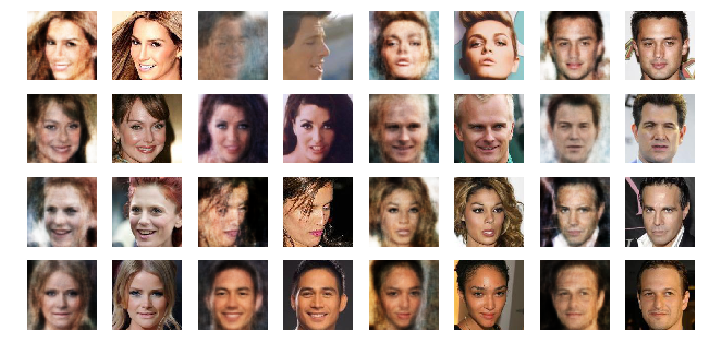

In [13]:
test_images = np.array([get_image(i+1) for i in range(16)])
predictions = model(test_images, training=False)

fig = plt.figure(figsize=(12,12))

for i in range(0, predictions.shape[0], 2):
    plt.subplot(8, 8, i+1)
    plt.imshow(np.squeeze(predictions[i]))
    plt.axis('off')
    plt.subplot(8, 8, i+2)
    plt.imshow(np.squeeze(test_images[i]))
    plt.axis('off')
    plt.subplot(8, 8, i+17)
    plt.imshow(np.squeeze(predictions[i+1]))
    plt.axis('off')
    plt.subplot(8, 8, i+18)
    plt.imshow(np.squeeze(test_images[i+1]))
    plt.axis('off')
    
plt.show()